In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv
/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data/A_Z Handwritten Data.csv


In [4]:
data = pd.read_csv("/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv")

In [5]:
# df= pd.read_csv("/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data/A_Z Handwritten Data.csv")

In [6]:
data.shape

(372450, 785)

In [7]:
data.columns

Index(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9',
       ...
       '0.639', '0.640', '0.641', '0.642', '0.643', '0.644', '0.645', '0.646',
       '0.647', '0.648'],
      dtype='object', length=785)

In [8]:
data.sample(1)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
223062,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
import seaborn as sb

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='0.7', ylabel='Count'>

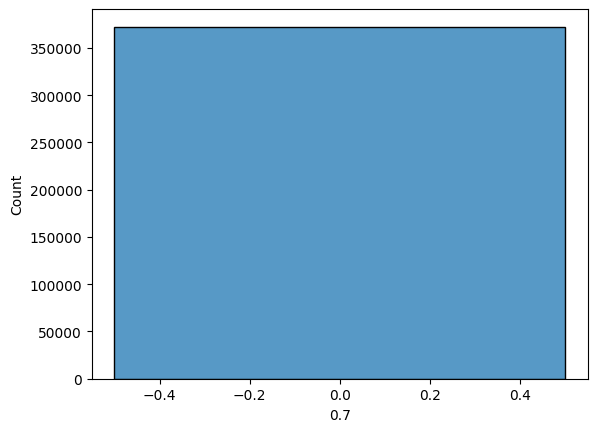

In [10]:
sb.histplot(data['0.7'])

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
X = data.drop(['0'], axis = 1)

In [13]:
y = data['0'] 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
y_train

20675      1
234698    18
21507      1
270540    18
248793    18
          ..
259178    18
365838    24
131932    13
146867    14
121958    13
Name: 0, Length: 297960, dtype: int64

In [16]:
X_train.shape

(297960, 784)

In [17]:
# Assuming X_train is your dataset with shape (num_samples, 784)
# Reshape X_train into a 3D array where each image is represented as a 28x28 matrix
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 28, 28))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 28, 28))

# Now X_train_reshaped is a 3D array with shape (num_samples, 28, 28)

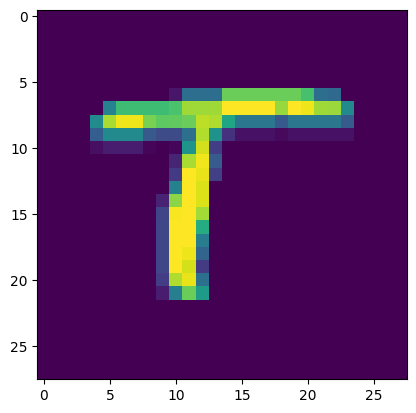

In [18]:
plt.imshow(X_train_reshaped[56])
plt.show()


In [19]:
X_train_reshaped = X_train_reshaped/255
X_test_reshaped = X_test_reshaped/255

In [20]:
X_train_reshaped

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [21]:
import tensorflow as tf
from tensorflow import keras

2024-04-21 03:21:35.956947: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 03:21:35.957337: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 03:21:36.153346: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten 

In [23]:
len(y_train.unique())#.sum()

26

In [24]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,834 (405.60 KB)

 Trainable params: 103,834 (405.60 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

In [27]:
model.fit(X_train_reshaped, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - loss: 0.5210 - val_loss: 0.1701
Epoch 2/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 0.1475 - val_loss: 0.1322
Epoch 3/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - loss: 0.1101 - val_loss: 0.1207
Epoch 4/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - loss: 0.0889 - val_loss: 0.1087
Epoch 5/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - loss: 0.0768 - val_loss: 0.1006
Epoch 6/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 0.0678 - val_loss: 0.1017
Epoch 7/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - loss: 0.0614 - val_loss: 0.0958
Epoch 8/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - loss: 0.0562 - val_loss: 0.0917
Epoch 9/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - loss: 0.0490 - val_loss: 0.0945
Epoch 10/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - loss: 0.0458 - val_loss: 0.0935


In [28]:
y_prob = model.predict(X_test_reshaped)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [29]:
y_prob

array([[6.23821965e-17, 2.61143070e-18, 1.59068960e-24, ...,
        1.43478301e-14, 1.28980726e-09, 1.15688183e-16],
       [0.00000000e+00, 4.24083566e-13, 2.93180985e-20, ...,
        1.00720320e-26, 6.88684938e-25, 7.94659554e-20],
       [1.36445394e-17, 1.00194120e-06, 9.95560646e-01, ...,
        8.99277966e-21, 1.86286620e-12, 2.52569042e-11],
       ...,
       [5.07712748e-18, 1.81861742e-06, 1.27250016e-10, ...,
        2.68086620e-08, 3.79380872e-05, 3.44090232e-08],
       [1.38442093e-08, 9.43369298e-13, 1.05645388e-14, ...,
        1.30161859e-14, 1.03490532e-16, 4.66487959e-13],
       [3.66454153e-28, 9.01340038e-13, 1.38300115e-17, ...,
        1.13367712e-28, 5.29503959e-16, 2.94229246e-23]], dtype=float32)

In [30]:
y_pred =y_prob.argmax(axis=1)

In [31]:
model.export('classifier.pkl')

Saved artifact at 'classifier.pkl'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  133317661806608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133317661803088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133317661807488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133317661811184: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test, y_pred)

0.9773258155457109

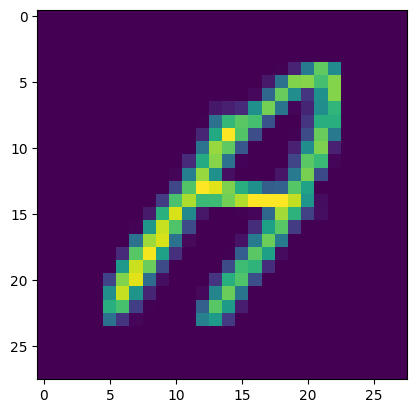

In [34]:
 plt.imshow(X_test_reshaped[4])

In [38]:
import pickle

In [41]:
model.save("model.h5")

In [35]:
for i in range(0,10):
    p=model.predict(X_test_reshaped[i].reshape(1,28,28)).argmax(axis=1)
    print("predicted : ", p)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
predicted :  [12]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
predicted :  [18]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
predicted :  [2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
predicted :  [14]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
predicted :  [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
predicted :  [11]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
predicted :  [14]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
predicted :  [2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
predicted :  [19]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
predicted :  [22]


In [36]:
alpha_dict={
    '0':'A',
    '1':'B',
    '2':'C',
    '3' :'D',
    '4':'E',
    '5':'F',
    '6':'G',
    '7':'H',
    '8':'I',
    '9':'J',
    '10':'K',
    '11':'L',
    '12':'M',
    '13':'N',
    '14':'O',
    '15':'P',
    '16':'Q',
    '17':'R',
    '18':'S',
    '19':'T',
    '20':'U',
    '21':'V',
    '22':'W',
    '23':'X',
    '24':'Y',
    '25':'Z'
}

In [37]:
df[df['0']==13]

NameError: name 'df' is not defined